<a href="https://colab.research.google.com/github/ramu11/PyTorch_ML_Models/blob/main/ML_PyTorch/02_neural_network_classification_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Neural network classification with pyTorch
# classification is a problem of predicting one thing or other
# Book: https://www.learnpytorch.io/02_pytorch_classification/


###1. Make classification data
# The data we are working here is with toy data set
# Book: https://scikit-learn.org/stable/datasets/toy_dataset.html
# This is Binary classification. Going to classify Blue and Red circles


In [ ]:
import torch
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)





(1000, 1000)

In [ ]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [ ]:
# Make data frame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


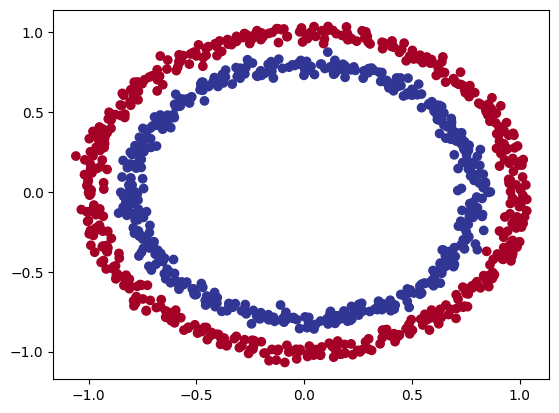

In [ ]:
# visualize
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


### 1.1 Check Input and Out put shapes

In [ ]:
X.shape, y.shape
# Here 2 features of X(X1, X2) represents 1 Y label

((1000, 2), (1000,))

In [ ]:
# view the first example of features and label
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import  torch
from sklearn.model_selection import train_test_split
X, type(X), X.dtype, X.shape, type(y), y.dtype, y.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 numpy.ndarray,
 dtype('float64'),
 (1000, 2),
 numpy.ndarray,
 dtype('int64'),
 (1000,))

In [ ]:
# split data into training and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

### 2. Build a  model
# Let's build  a model to classify blue and red dots.
# To do so we want to:
# 1. Set up device agonistic code so that our code on accelerator (GPU)
# 2. Construct a model ( by subclassing **nn.Module** )
# 3. Define loss function(cost function) and optimizer
# 4. Create training and test loop


In [ ]:
# import pytorch and nn
import torch
from torch import nn

# make device agonistic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device
X_train.shape, y_train.shape

((800, 2), (800,))

### Let's create a  model that:
#1. subclass **nn.Module**
#2. create **nn.Linear()** layers that are capable of handling the shapes of our data
#3 Define a **forward()**  method that outlines the forward pass of the model
#4.Instantiate an instance of our model class and send it to the target device

Note: Tinker With a Neural Network Right Here in Your Browser: https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=5,5,5,5,5&seed=0.43442&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false


In [ ]:
# 1. Construct a model that subclass nn.Module()
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. create 2 nn.Linear() layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single layer (same shape a y)

# 3. define a forward() method that outlines forward pass
  def forward(self, x):
    print(f"Input data type: {x.dtype}")
    #3. Define a forward() method that outlines the forward pass of the model
    return self.layer_2(self.layer_1(x)) # x--> layer_1 ------> layer_2 -----> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0




CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Let's replicate the model above using nn.Sequential()
import torch
from torch import nn
# create a model with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [ ]:
model_0, model_0.state_dict()


(Sequential(
   (0): Linear(in_features=2, out_features=5, bias=True)
   (1): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('0.weight',
               tensor([[ 0.2248,  0.5687],
                       [-0.4503,  0.4879],
                       [ 0.5167, -0.4920],
                       [-0.7051, -0.1881],
                       [-0.1704,  0.5495]])),
              ('0.bias',
               tensor([-0.4038,  0.2162,  0.3306,  0.3096, -0.1767])),
              ('1.weight',
               tensor([[-0.3553,  0.2853,  0.0083, -0.0938, -0.4373]])),
              ('1.bias', tensor([-0.0823]))]))

In [ ]:
X_test = torch.from_numpy(X_test).to(torch.float32)
y_test = torch.from_numpy(y_test).to(torch.float32)




In [ ]:
# make predictions

X_test.dtype, y_test.dtype

untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")


Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [-0.]], grad_fn=<RoundBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Set up loss function and optimizer
# Which loss fuction or optimizer we should use
# For ex for regression use MAE or MSE (prediction)
# For classification use Binary Cross Entropy or Categorical cross entropy
#  refer: https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
Book: https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.BCEWithLogitsLoss

# loss function measures how **wrong** your model predictions are
# optimizer: 2 most common and useful are SGD and Adam , however pytorch has many built-in options Book: https://pytorch.org/docs/stable/optim.html




In [ ]:
# set up the loss function

loss_fn = nn.BCEWithLogitsLoss() # this has sigmoid activation function built-in

# set up the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [ ]:
# calculate the accuracy- out of 100 examples what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() #
  acc = (correct / len(y_pred)) * 100
  return acc



### 3. Train model
# To train model, build training loop
**Forward pass** - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).

**Calculate the loss** - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).

**Optimizer Zero gradients** - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).

**Perform backpropagation on the loss** - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).

**Step the optimizer (gradient descent)** - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

### 3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)
# Our model outputs are going to be raw  **logits**
# we can convert these logits into prediction probabilities by passing them to some kind of activation function (eg: sigmoid for binary classification and softmax for multi classification).

# Then we can convert our model's prediction probabilities to **prdiction labels** by either rounding them or by taking the ** argmax()**.

In [ ]:
# view the first 5 outputs of forward pass on the test data

In [ ]:
with torch.inference_mode():
 y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-9.8780e-05],
        [-1.0517e-01],
        [ 3.0951e-01],
        [-8.7966e-02],
        [ 3.6374e-01]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activatiuon function on our model logits to turn them into preddiction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5000],
        [0.4737],
        [0.5768],
        [0.4780],
        [0.5899]])

### For our prediction probability values, we need to perform range-style rounding on them:
# **y_pred_probs**  >= 0.5 y=1 (class 1)
# **y_pred_probs**  < 0.5 y=0 (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Build a training and test loop


In [ ]:


torch.manual_seed(42)

# set the no of epochs
epochs = 100
# Put the data to target device

X_train, y_train = torch.from_numpy(X_train).to(torch.float32).to(device), torch.from_numpy(y_train).to(torch.float32).to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build a training loop
for epochs  in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits---> pred probs ----> pred labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. calculate the test loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                          y_pred=test_pred)


    # print out what's happenning
    if(epochs % 10 == 0):
      print(f"Epoch: {epochs} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.70325, Accuracy: 53.12% | Test loss: 0.69357, Test acc: 52.50%
Epoch: 10 | Loss: 0.69850, Accuracy: 51.25% | Test loss: 0.69136, Test acc: 55.50%
Epoch: 20 | Loss: 0.69639, Accuracy: 49.50% | Test loss: 0.69083, Test acc: 54.50%
Epoch: 30 | Loss: 0.69533, Accuracy: 49.38% | Test loss: 0.69086, Test acc: 54.00%
Epoch: 40 | Loss: 0.69472, Accuracy: 48.75% | Test loss: 0.69106, Test acc: 54.00%
Epoch: 50 | Loss: 0.69433, Accuracy: 48.88% | Test loss: 0.69131, Test acc: 54.50%
Epoch: 60 | Loss: 0.69405, Accuracy: 48.50% | Test loss: 0.69155, Test acc: 53.00%
Epoch: 70 | Loss: 0.69385, Accuracy: 48.12% | Test loss: 0.69178, Test acc: 53.00%
Epoch: 80 | Loss: 0.69368, Accuracy: 48.38% | Test loss: 0.69200, Test acc: 53.00%
Epoch: 90 | Loss: 0.69355, Accuracy: 48.12% | Test loss: 0.69220, Test acc: 52.50%


### 4.Make predictions and evaluate the model
# from the metrics it looks like our model is not learning anything
# we  will test, make some predictions and visualize
# to visualize, we are going to import a function called **plot_decision_boundary()**  from helper_functions.py

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


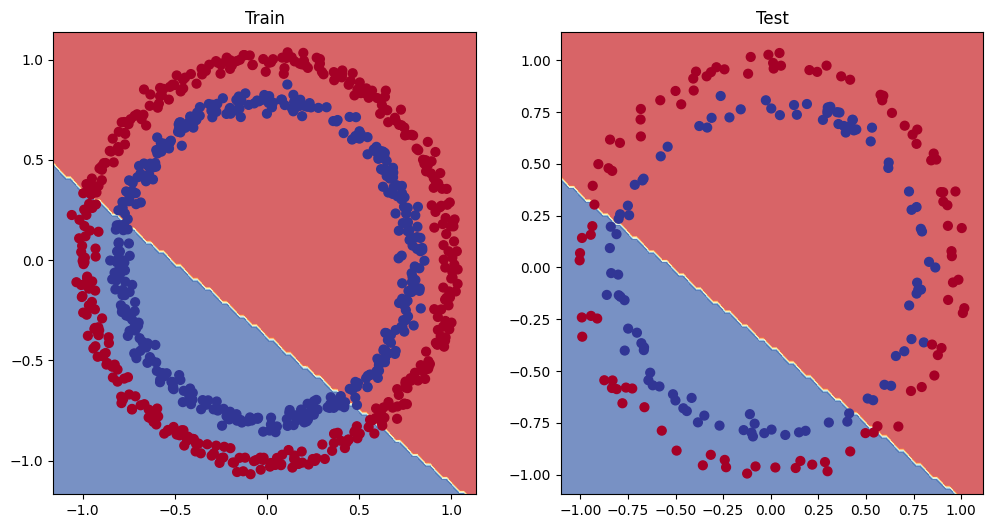

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


### 5. Improving model
# Add more layers
# Add more hidden units
# Fitting for longer (more epochs)
# Changing the activation functions
# Change the learning rate
# Change the loss function

# These options are all from model perspective ,because they deal directly with model, rather than data

# Let's try and improve our model by
# 1. Add more hidden units : 5-->15
# 2. Increase the layers : 2-->3
# 3. Increase no of epochs: 100--->1000


In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=15)
    self.layer_2 = nn.Linear(in_features=15, out_features=15)
    self.layer_3 = nn.Linear(in_features=15, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to( device)
model_1.state_dict()


OrderedDict([('layer_1.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732],
                      [-0.5424,  0.5802],
                      [ 0.2037,  0.2929],
                      [ 0.2236, -0.0123],
                      [ 0.5534, -0.5024],
                      [ 0.0445, -0.4826],
                      [ 0.2180, -0.2435],
                      [ 0.2167, -0.1473],
                      [ 0.5865, -0.4191],
                      [-0.4217, -0.4217],
                      [ 0.6360,  0.2356]])),
             ('layer_1.bias',
              tensor([ 0.6804, -0.5836, -0.7014, -0.5532, -0.4757,  0.2864,  0.2532,  0.5876,
                      -0.3652, -0.4820,  0.3752, -0.2858,  0.4292, -0.1678,  0.4045])),
             ('layer_2.weight',
              tensor([[-0.2006, -0.1303,  0.0787,  0.0546, -0.0658,  0.1539,  0.1755, -0.18

In [ ]:
# create  a loss function
loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

# write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train
epochs = 1000

# put the data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits ----> Prediction probabilities ---> prediction labels

  # calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backwards (backward propagation)
  loss.backward()

  # Optimizer step (gradient descent)
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. calculate the test loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                          y_pred=test_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

  # Print out what's happenning
  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")





Epoch: 0 | Loss: 0.69595, Accuracy: 59.62% | Test loss: 0.69707, Test acc: 54.00%
Epoch: 100 | Loss: 0.69301, Accuracy: 51.12% | Test loss: 0.69469, Test acc: 47.50%
Epoch: 200 | Loss: 0.69298, Accuracy: 51.50% | Test loss: 0.69470, Test acc: 45.50%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.25% | Test loss: 0.69469, Test acc: 45.50%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


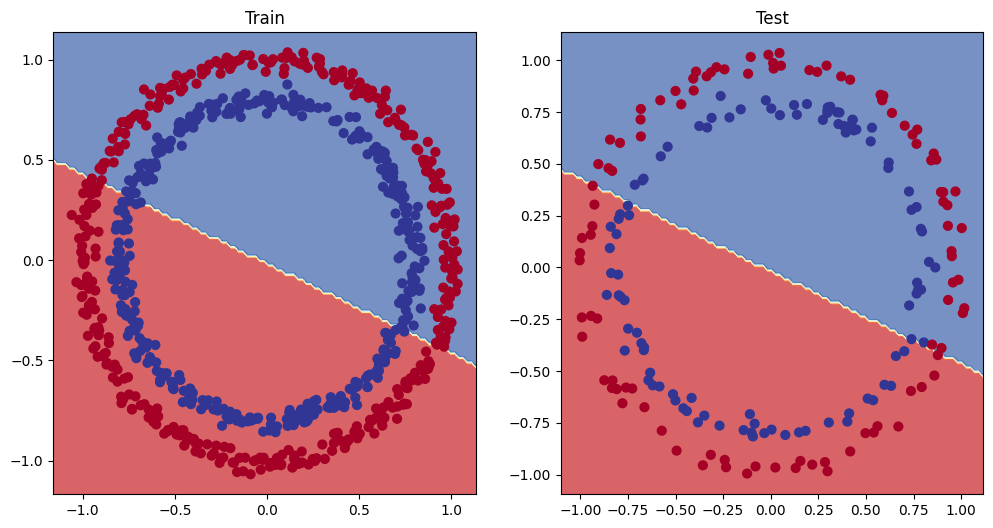

In [ ]:
# plot the descision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)


### 5.1 Preparing data to see if our model can model a straight line
# Let's create some linear data to see if our model's able to model it and we're not just using a model that can't learn anything.

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


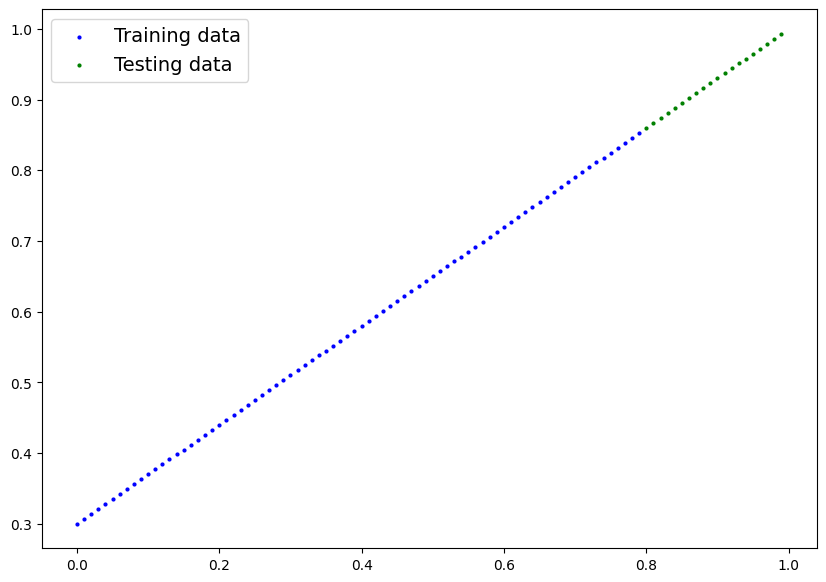

In [ ]:
# To do so, we'll use the plot_predictions() function we created in notebook 01.
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

### 5.2 Adjusting **model_1** to fit straight line

In [ ]:
#Now we've got some data, let's recreate model_1 but with a loss function suited to our regression data.
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=15),
    nn.Linear(in_features=15, out_features=15),
    nn.Linear(in_features=15, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=15, bias=True)
  (1): Linear(in_features=15, out_features=15, bias=True)
  (2): Linear(in_features=15, out_features=1, bias=True)
)

In [ ]:
# We'll setup the loss function to be nn.L1Loss() (the same as mean absolute error) and the optimizer to be torch.optim.SGD().
# loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


In [ ]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")





Epoch: 0 | Train loss: 1.18385, Test loss: 0.98619
Epoch: 100 | Train loss: 0.10997, Test loss: 0.03161
Epoch: 200 | Train loss: 0.06084, Test loss: 0.00675
Epoch: 300 | Train loss: 0.05716, Test loss: 0.00907
Epoch: 400 | Train loss: 0.06130, Test loss: 0.01974
Epoch: 500 | Train loss: 0.06542, Test loss: 0.01070
Epoch: 600 | Train loss: 0.05866, Test loss: 0.00823
Epoch: 700 | Train loss: 0.06917, Test loss: 0.02998
Epoch: 800 | Train loss: 0.06854, Test loss: 0.02866
Epoch: 900 | Train loss: 0.05952, Test loss: 0.02222


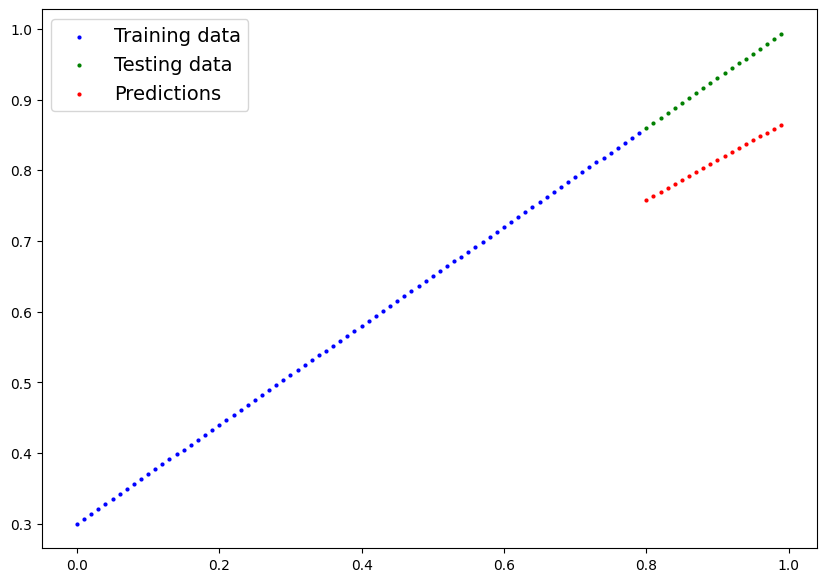

In [ ]:
# Turn on evaluation mode
model_2.eval
# Make predictions
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());



### 6. The missing piece: non-linearity
# We've seen our model can draw straight (linear) lines, thanks to its linear layers.
# what patterns could you draw if you were given an infinite amount of straight and non-straight lines?
#or
# in machine learning terms an infinite amount of linear and non-linear functions?




### 6.1 Recreating non-linear data (red and blue cirles)

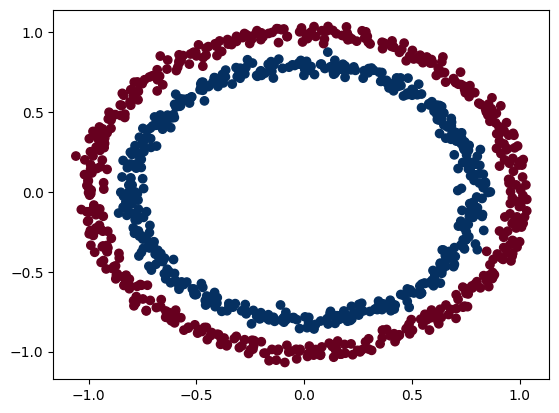

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [ ]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity
# Lnear = straight lines
# Non-Linear = Not Straight lines

# PyTorch has a bunch of ready-made [non-linear activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) that do similiar but different things

# Artificial neural networks are a large combination of linear(straight) and non-linear(not-straight) functions which are potentially able to find patterns in data

In [ ]:
# Build  a model with non-linearity functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

# Binary classification examples
# Email spam or not spam
# Credit card fraud or not fraud
# Insurance claims fault or not fault

### 6.3 Training a model with non-linearity

In [ ]:
#  let's create a training and testing loop.
#  Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


### 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
  print(y_preds[:10])
  print(y_test[:10])

tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


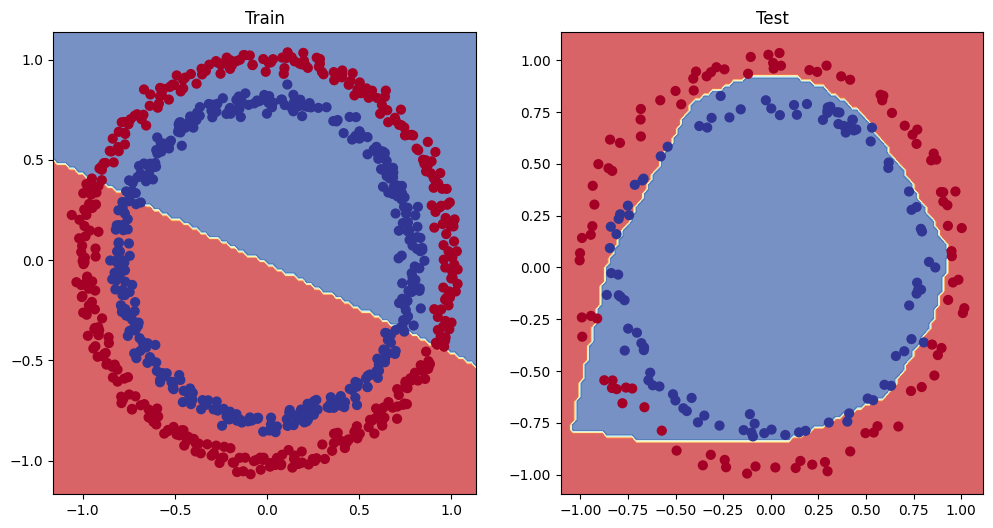

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity


### Putting it all together with multi-class classification problem
# Binary classification = one thing or another(cat vs dog,spam vs not spam)
# Multi-class classification = More than one thing or another (cat vs dog vs chicken)


### 8.1 Creating  a Toy Multi-class data set
 # # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

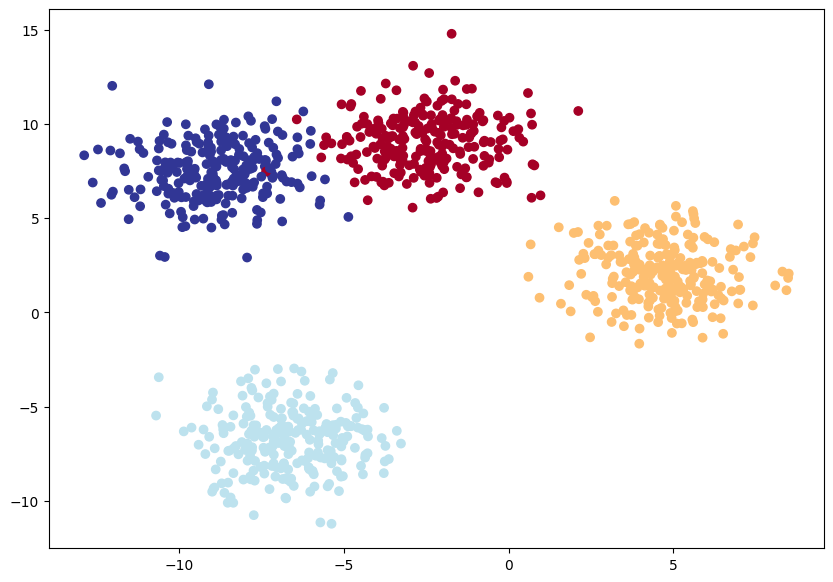

In [ ]:
# Import Dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyper parameters for data selection
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # Give the clusters a little shake up
                            random_state=RANDOM_SEED)

# Turn the data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split the data into training and tests
X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);



In [ ]:
X_blob.shape, y_blob.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [ ]:
X_train_blob.shape, y_train_blob.shape, y_train_blob[:5]

(torch.Size([800, 2]), torch.Size([800]), tensor([1, 0, 2, 2, 0]))

### 8.2 Building multi-class classification PyTorch model

In [ ]:
# create device agonostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [ ]:
# Build multi-class classification model
import torch
from torch import nn
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )


  def forward(self, x):
      return self.linear_layer_stack(x)

# create  an instance of a blob model and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4






BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 create a loss function and optimizer for a multi-class classification model


In [ ]:
# Create a loss function multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)


### 8.4 Getting prediction probabilities for a multi-class PyTorch model
# In order to evaluate train and test our model, we need to convert's our model's outputs(logits) to prediction probabilities and then prediction labels

# logits(raw output of the model) ----> pred probs(**torch.softmax**) ---> prediction labels(take the **argmax** of he prediction probabilities)

In [ ]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test_blob.to(device))

y_logits[:5]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])

In [ ]:
y_test_blob[:5]

tensor([1, 3, 2, 1, 0])

In [ ]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) # https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html
print(y_logits[:5])
print(y_pred_probs[:5])



tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [ ]:
# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)
print(y_preds[:5])
print(y_test_blob[:5])


tensor([1, 0, 0, 0, 0])
tensor([1, 3, 2, 1, 0])


In [ ]:
y_train_blob.dtype

torch.int64

### 8.5 Creating a training and testing loop for a multi-class PyTorch model

In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs
epochs = 100

# Put data on target device
X_train_blob = X_train_blob.to(device)
X_test_blob = X_test_blob.to(device)
y_train_blob = y_train_blob.to(device)
y_test_blob = y_test_blob.to(device)

# loop through the data
for epoch in range(epochs):
  # training
  model_4.train()

  y_logits = model_4(X_train_blob)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_train_blob)
  acc = accuracy_fn(y_true=y_train_blob,
                      y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  # testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test_blob)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test_blob)
    test_acc = accuracy_fn(y_true=y_test_blob,
                      y_pred=test_preds)

  # print out what's happenning
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")








Epoch: 0 | Loss: 0.98013, Acc: 61.38% | Test Loss: 0.94132, Test Acc: 64.00%
Epoch: 10 | Loss: 0.59793, Acc: 97.75% | Test Loss: 0.61280, Test Acc: 98.00%
Epoch: 20 | Loss: 0.38755, Acc: 98.88% | Test Loss: 0.39071, Test Acc: 100.00%
Epoch: 30 | Loss: 0.21937, Acc: 99.25% | Test Loss: 0.20881, Test Acc: 99.50%
Epoch: 40 | Loss: 0.09758, Acc: 99.25% | Test Loss: 0.08844, Test Acc: 99.50%
Epoch: 50 | Loss: 0.06198, Acc: 99.25% | Test Loss: 0.05427, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04874, Acc: 99.25% | Test Loss: 0.04095, Test Acc: 99.50%
Epoch: 70 | Loss: 0.04189, Acc: 99.25% | Test Loss: 0.03369, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03763, Acc: 99.25% | Test Loss: 0.02912, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03478, Acc: 99.25% | Test Loss: 0.02612, Test Acc: 99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class classification model

In [ ]:
# make predictions
model_4.eval()
with torch.inference_mode():
  y_preds = torch.softmax(model_4(X_test_blob), dim=1).argmax(dim=1)

# View the first 10 predictions
print(y_preds[:10])
print(y_test_blob[:10])


tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])


In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

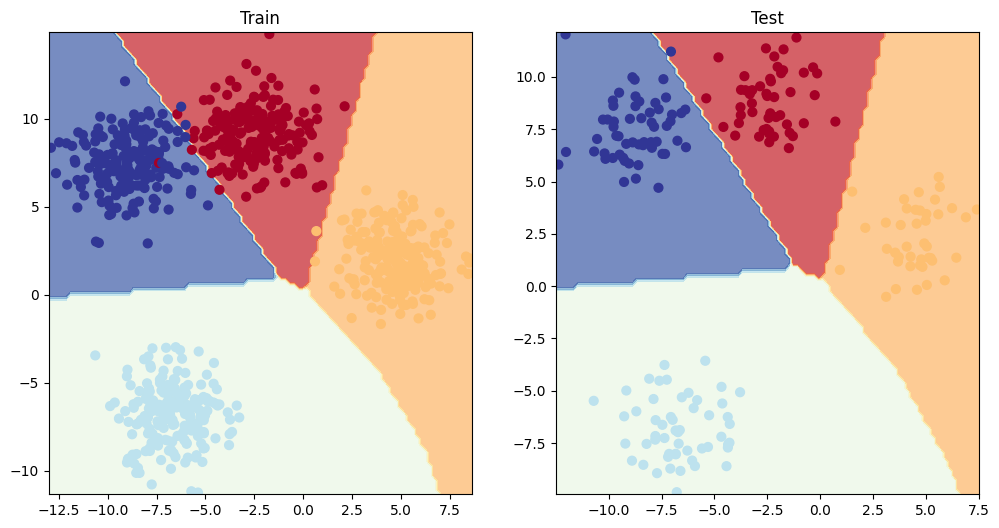

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train_blob, y_train_blob)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test_blob, y_test_blob)

### 9. A Few More classification metrics (To evaluate our classification model)
* Accuracy - Out of 100 predictions, how many does your model get correct?
* Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives
* Recall - Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1)
* F1-score - Combines precision and recall into one metric. 1 is best, 0 is worst.
* Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* Classification report - Collection of some of the main classification metrics such as precision, recall and f1-score.

# refer ths article for when to use precision/Recall: https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

# Refer PyTorch metrics: https://lightning.ai/docs/torchmetrics/stable/classification/accuracy.html

In [ ]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_test_blob)

tensor(0.9950)